# The Fixed point method
__CYBR 304__ <br>
_Spring 2024_ <br>

Here is a simple implementation of the fixed point method. Let's default the tolerance to 64 times the machine epsilon of the initial term of the fixed point sequence. And we'll default the maximum number of iterations to 50.

It's sometimes frustating to remember the argument order, especiall for `tol` and `maxiter.` If you like, you can convert the last two arguments to keyword arguments.

In [66]:
"""
    fixed_point((f::Function, x0::Number, tol::Number = 64*eps(typeof(x)), maxiter::Integer = 50)

Find at most `maxiter` terms of the fixed point sequence for `f` whose intial term is `x0`. When 
consecutive terms of the seqence `a` and `b` satisfy `isapprox(a,b, x1, atol=tol, rtol=tol), return 
`b`. 

# Example
```julia-repl
julia> fixed_point(cos, 1.0)
0.7390851332151657
```
"""
function fixed_point(f::Function, x0::Number, tol::Number = 64*eps(typeof(x0)), maxiter::Integer = 50)
    x1 = f(x0)
    while !isapprox(x0, x1, atol=tol, rtol=tol) && !isnan(x1) && !isinf(x1) && maxiter > 0
        @show(x1) #Likely we don't want to print these values, but 
        maxiter -= 1
        (x0,x1) = (x1, f(x1))
    end
    maxiter > 0 || error("Fixed point sequence converges too slowly.")
    x1
end

fixed_point

We'll need to find some derivatives. To do this, we'll use the package `ForwardDiff.` The first time we use this package,
we need to use the package manager to add it. After that, we can just load it.

Let's find the fixed points  of $x \mapsto  x^2 - 5 x + 4$ are 1 and 4. We'll start with a graphical analysis

In [67]:
using Gadfly, ForwardDiff

In [68]:
F = x -> x^2-4*x + 4

#52 (generic function with 1 method)

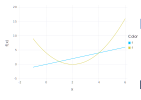

In [69]:
plot([x -> x, F],-1,6)

OK, it looks like the fixed points are $1$ and $4$. We can check this

In [70]:
F(1), F(4)

(1, 4)

The value of the derivative at each fixed point tells us we expect the fixed point sequence to converge; let's check:

In [71]:
dF = x -> ForwardDiff.derivative(F,x)

#56 (generic function with 1 method)

In [72]:
(dF(1), dF(4))

(-2, 4)

Both derivatives have magnitude greater than $1$. So we expect the fixed point sequences to diverge.

Try a starting value of $1.01$. Although this is super close to one fixed point, the fixed point sequence wanders around and doesn't appear to converge. At least initially, the terms of the sequence oscillate between being above the fixed point 1 to being below. This is due to the fact that $F^\prime(1) < 0$.

In [73]:
fixed_point(F, 1.001)

x1 = 0.9980010000000004
x1 = 1.0040019960009992
x1 = 0.9920120239699939
x1 = 1.0160397598210684
x1 = 0.9681777542529808
x1 = 1.0646571468184218
x1 = 0.8748662529978555
x1 = 1.2659259486430856
x1 = 0.5388647128755535
x1 = 2.134916327280239
x1 = 0.01820241536678857
x1 = 3.927521666458031
x1 = 3.7153397746651446
x1 = 2.942390542548269
x1 = 0.8880999346844209
x1 = 1.236321755248789
x1 = 0.5832044615062904
x1 = 2.0073095978956808
x1 = 5.3430221396588706e-5
x1 = 3.999786281969202
x1 = 3.999145173552204
x1 = 3.996581424937073
x1 = 3.9863373864037523
x1 = 3.9455362126252904
x1 = 3.7851111546363594
x1 = 3.1866218344071555
x1 = 1.4080713778918028
x1 = 0.3503794936709088
x1 = 2.721247814901447
x1 = 0.5201984105001118
x1 = 2.1898127442863955
x1 = 0.03602887789353293
x1 = 3.8571825684681356
x1 = 3.4491270926219
x1 = 2.0999693305708007
x1 = 0.009993867054774341
x1 = 3.960124409159611
x1 = 3.842087699383315
x1 = 3.393287092219314
x1 = 1.9412489213449504
x1 = 0.0034516892431319945
x1 = 3.9862051571861

LoadError: Fixed point sequence converges too slowly.

Again since $F^\prime (1) = -2$, so we don't expect the fixed point sequence to converge; it's worse at 4, where the derivative at that fixed point is $4$.  Since $F^\prime(4) > 0$, we expect the sequence to diverge to infinity. With a starting value of  $4.0000001$, it does.

In [74]:
fixed_point(F, 4.0000001)

x1 = 4.000000400000012
x1 = 4.000001600000207
x1 = 4.0000064000033895
x1 = 4.000025600054517
x1 = 4.0001024008734305
x1 = 4.000409613979659
x1 = 4.001638623702249
x1 = 4.006557179896632
x1 = 4.026271716194724
x1 = 4.105777067850713
x1 = 4.434297059485946
x1 = 5.925802173821921
x1 = 15.411922707984921
x1 = 179.87967072496158
x1 = 31641.177257220756
x1 = 1.0010375375138352e9
x1 = 1.0020761475076128e18
x1 = 1.004156605403699e36
x1 = 1.00833048817588e72
x1 = 1.0167303733850085e144
x1 = 1.0337406521636189e288


Inf

One cure is to algebraically transform the equation $ x^2 - 4 x + 4 = x$ into an equivalent fixed point problem. There are lots of ways to do this. One way is to solve for $x^2$. Thus
$$
x^2 = 5 x - 4.
$$
Dividing by $x$ gives a fixed point problem
$
 x = \frac{5 x -4}{x}.
$
Of course if zero were a fixed point (it isn't), the division by zero would have eliminated zero as a fixed point.
Let's define $G(x) = \frac{5 x -4}{x}$ and look at its fixed point sequences

In [75]:
G = x ->  (5*x-4)/x

#58 (generic function with 1 method)

Study this graphically--the slope at the fixed point looks to have a magnitude larger than 1 (divergence), but the slope at the fixed point $4$ looks shallow (convergence).

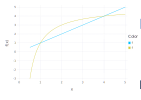

In [76]:
plot([x -> x, G],0.5,5)

In [77]:
dG = x -> ForwardDiff.derivative(G,x)

#62 (generic function with 1 method)

Did we do our algebra correctly? Does $G$ have fixed points at $1$ and $4$. Yes!

In [78]:
(G(1), G(4))

(1.0, 4.0)

What about the derivatives of $G$ at the fixed points?

In [79]:
dG(1), dG(4)

(4.0, 0.25)

A fixed point sequence that starts near $4$ will converge; with a start near $1$, we don't expect it to converge to $1$ Oops--with a starting value of 1.5, the FP sequence converges to 4. Same with an initial value of 11.0

In [80]:
fixed_point(G, 1.5)

x1 = 2.3333333333333335
x1 = 3.285714285714286
x1 = 3.7826086956521743
x1 = 3.942528735632184
x1 = 3.9854227405247813
x1 = 3.996342355523043
x1 = 3.999084751967783
x1 = 3.9997711356250285
x1 = 3.9999427806323884
x1 = 3.999985694953466
x1 = 3.9999964237255767
x1 = 3.999999105930595
x1 = 3.999999776482599
x1 = 3.999999944120647
x1 = 3.999999986030162
x1 = 3.999999996507541
x1 = 3.9999999991268855
x1 = 3.9999999997817217
x1 = 3.9999999999454308
x1 = 3.999999999986358
x1 = 3.99999999999659
x1 = 3.999999999999148
x1 = 3.9999999999997873
x1 = 3.999999999999947


3.999999999999987

In [81]:
fixed_point(G, 11.0)

x1 = 4.636363636363637
x1 = 4.137254901960785
x1 = 4.033175355450237
x1 = 4.008225616921269
x1 = 4.002052184110232
x1 = 4.000512782946305
x1 = 4.000128179304536
x1 = 4.000032043799296
x1 = 4.000008010885649
x1 = 4.000002002717402
x1 = 4.0000005006791
x1 = 4.000000125169759
x1 = 4.000000031292439
x1 = 4.000000007823109
x1 = 4.000000001955778
x1 = 4.000000000488944
x1 = 4.000000000122236
x1 = 4.000000000030559
x1 = 4.00000000000764
x1 = 4.00000000000191
x1 = 4.000000000000478
x1 = 4.000000000000119
x1 = 4.00000000000003


4.000000000000007

### The Wegstein method

From $F(x)$  we subtract $q (F(x) - x)$, where we attempt to choose the number $q$ so that the derivative of $x \mapsto F(x) + q (F(x) - x)$ vanishes at the fixed point. And a derivative of zero at a fixed point gives fast convergence.

Of course, we don't know the fixed point, so we'll use our initial guess as its approximate value.  For this choice, we have $q = -F^\prime(x_0) /(1 - F^\prime(x_0))$. The method is

In [86]:
function fixed_pointX(f::Function, x::Number, tol::Number = 64*eps(typeof(x)), maxiter::Integer = 150)
    df = x -> ForwardDiff.derivative(f,x)
    q = -df(x)/(1-df(x))
    fixed_point(x -> (1-q)*f(x) + q*x,x,tol,maxiter)
end

fixed_pointX (generic function with 3 methods)

Returning to the function $F$, the Wegstein method allows for convergence to both fixed points!

In [87]:
fixed_pointX(F, 1.5)

x1 = 0.875
x1 = 1.0703125
x1 = 0.967315673828125
x1 = 1.0168762956745923
x1 = 0.9917042568405519
x1 = 1.0041822812570078
x1 = 0.9979176051097526
x1 = 1.0010433656293634
x1 = 0.9994788614912364
x1 = 1.0002607050470544
x1 = 0.9998696814600336
x1 = 1.000065167761444
x1 = 0.9999674182426965
x1 = 1.000016291409437
x1 = 0.9999918544279864
x1 = 1.000004072819182
x1 = 0.9999979635987029
x1 = 1.0000010182027221
x1 = 0.9999994908991572
x1 = 1.000000254550551
x1 = 0.9999998727247569
x1 = 1.0000000636376296
x1 = 0.9999999681811872
x1 = 1.000000015909407
x1 = 0.9999999920452968
x1 = 1.0000000039773518
x1 = 0.9999999980113241
x1 = 1.000000000994338
x1 = 0.999999999502831
x1 = 1.0000000002485845
x1 = 0.9999999998757078
x1 = 1.000000000062146
x1 = 0.999999999968927
x1 = 1.0000000000155365
x1 = 0.9999999999922318
x1 = 1.000000000003884
x1 = 0.999999999998058
x1 = 1.000000000000971
x1 = 0.9999999999995145
x1 = 1.0000000000002427
x1 = 0.9999999999998787
x1 = 1.0000000000000606
x1 = 0.9999999999999697
x1 

1.0000000000000038

In [88]:
fixed_pointX(F, 6.5)

x1 = 4.78125
x1 = 4.4119873046875
x1 = 4.236275373026729
x1 = 4.140693851654341
x1 = 4.085459312297296
x1 = 4.052499158428519
x1 = 4.032467453813362
x1 = 4.0201603916887105
x1 = 4.012549439631314
x1 = 4.007823713715188
x1 = 4.004882169759956
x1 = 4.003048376652276
x1 = 4.0019040738326455
x1 = 4.001189592958259
x1 = 4.000743318707485
x1 = 4.000464505126841
x1 = 4.000290288733649
x1 = 4.000181419925088
x1 = 4.0001133833390305
x1 = 4.000070862979921
x1 = 4.000044288734756
x1 = 4.0000276802140355
x1 = 4.000017300037998
x1 = 4.000010812486337
x1 = 4.000006757789347
x1 = 4.000004223612634
x1 = 4.0000026397556665
x1 = 4.00000164984642
x1 = 4.000001031153673
x1 = 4.000000644470912
x1 = 4.000000402794269
x1 = 4.000000251746398
x1 = 4.000000157341491
x1 = 4.000000098338429
x1 = 4.000000061461517
x1 = 4.000000038413448
x1 = 4.000000024008405
x1 = 4.000000015005254
x1 = 4.000000009378284
x1 = 4.000000005861427
x1 = 4.000000003663391
x1 = 4.000000002289619
x1 = 4.000000001431012
x1 = 4.000000000894

4.000000000000075

In [89]:
function wegstein(f::Function, x::Number, tol::Number = 64*eps(typeof(x)), maxiter::Integer = 125)
    not_done = true
    df = x -> ForwardDiff.derivative(f,x)
    function ff(x)
         q = -df(x)/(1-df(x))
        (1-q)*f(x) + q*x
    end
    fixed_point(ff, x, tol, maxiter)
    end;

In [90]:
wegstein(F,1.3)

x1 = 0.9625000000000001
x1 = 0.9995426829268294
x1 = 0.9999999303082789
x1 = 0.9999999999999983


1.0

In [91]:
wegstein(F,107.0)

x1 = 54.76076555024017
x1 = 28.65190944026108
x1 = 15.618972611522723
x1 = 9.145239972097373
x1 = 5.991914098033163
x1 = 4.5681299228091135
x1 = 4.0780346547939965
x1 = 4.0019294276365605
x1 = 4.000001239302904
x1 = 4.0000000000005125
x1 = 4.0


4.0

Here is a version that returns an array of the terms of the fixed point sequence

In [92]:
function fixed_point_collect(f::Function, x0::Number, tol::Number = 64*eps(typeof(x0)), maxiter::Integer = 50)
    x1 = f(x0)
    L = [x0]
    while !isapprox(x0, x1, atol=tol, rtol=tol) && !isnan(x1) && !isinf(x1) && maxiter > 0
        maxiter -= 1
        (x0,x1) = (x1, f(x1))
        push!(L,x1)
    end
    maxiter > 0 || error("Fixed point sequence converges too slowly.")
    L
end



fixed_point_collect (generic function with 3 methods)

In [94]:
p = fixed_point_collect(G, 53.0)

24-element Vector{Float64}:
 53.0
  4.187739463601533
  4.044830741079597
  4.011083465279349
  4.002763209834772
  4.000690325580085
  4.000172551615822
  4.000043136043157
  4.000010783894496
  4.000002695966356
  4.000000673991135
  4.000000168497755
  4.000000042124437
  4.000000010531109
  4.0000000026327776
  4.000000000658194
  4.000000000164548
  4.000000000041137
  4.000000000010284
  4.000000000002571
  4.000000000000643
  4.000000000000161
  4.00000000000004
  4.00000000000001

For linear convergence of a fixed point sequence we expect
$$
  \lim_{k \to \infty} \frac{x_{k+2} - x_{k+1}}{x_{k+1} - x_{k}} = F^\prime(x^\star)
$$
Let's check--recall that $G^\prime(4) = 1/4$. 

In [95]:
Rate = n -> (p[n+2] - p[n+1])/(p[n+1] - p[n])

#79 (generic function with 1 method)

In [96]:
xx = [k for k=1:length(p)-2];

In [97]:
yy = map(Rate, xx)

22-element Vector{Float64}:
 0.002927721866422705
 0.23614566840080967
 0.24654598770653038
 0.2491370930248931
 0.24978431048052094
 0.2499460799457191
 0.24998652013085457
 0.24999663003287614
 0.24999915752431603
 0.24999978948332144
 0.24999994684916108
 0.2499999877006297
 0.24999999297178804
 0.25000002811284855
 0.25000011245138165
 0.25
 0.24999820077870297
 0.24999280306301638
 0.25
 0.25011515430677106
 0.2504604051565378
 0.25

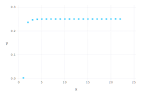

In [98]:
plot(x=xx, y=yy)